In [1]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn import preprocessing
from sklearn import preprocessing
from scipy.io import arff
import seaborn as sns
import pandas as pd
import numpy as np

In [2]:
T_SIZE = 0.50

In [3]:
df = pd.read_csv('../dataset/divorce.csv',sep=';')

In [4]:
df

,Atr1,Atr2,Atr3,Atr4,Atr5,Atr6,Atr7,Atr8,Atr9,Atr10,...,Atr46,Atr47,Atr48,Atr49,Atr50,Atr51,Atr52,Atr53,Atr54,Class
0,2,2,4,1,0,0,0,0,0,0,...,2,1,3,3,3,2,3,2,1,1
1,4,4,4,4,4,0,0,4,4,4,...,2,2,3,4,4,4,4,2,2,1
2,2,2,2,2,1,3,2,1,1,2,...,3,2,3,1,1,1,2,2,2,1
3,3,2,3,2,3,3,3,3,3,3,...,2,2,3,3,3,3,2,2,2,1
4,2,2,1,1,1,1,0,0,0,0,...,2,1,2,3,2,2,2,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165,0,0,0,0,0,0,0,0,0,0,...,1,0,4,1,1,4,2,2,2,0
166,0,0,0,0,0,0,0,0,0,0,...,4,1,2,2,2,2,3,2,2,0
167,1,1,0,0,0,0,0,0,0,1,...,3,0,2,0,1,1,3,0,0,0
168,0,0,0,0,0,0,0,0,0,0,...,3,3,2,2,3,2,4,3,1,0


In [5]:
df = df[['Atr42','Atr53','Atr48','Atr47','Atr52','Atr45','Atr43','Atr7','Atr46','Atr46','Class']]
df_col = df.columns

In [6]:
df

,Atr42,Atr53,Atr48,Atr47,Atr52,Atr45,Atr43,Atr7,Atr46,Atr46,Class
0,1,2,3,1,3,3,1,0,2,2,1
1,2,2,3,2,4,2,3,0,2,2,1
2,3,2,3,2,2,2,2,2,3,3,1
3,2,2,3,2,2,3,3,3,2,2,1
4,2,1,2,1,2,2,3,0,2,2,1
...,...,...,...,...,...,...,...,...,...,...,...
165,0,2,4,0,2,0,0,0,1,1,0
166,1,2,2,1,3,3,3,0,4,4,0
167,3,0,2,0,3,2,3,0,3,3,0
168,1,3,2,3,4,4,1,0,3,3,0


### Preprocessing

In [7]:
total = df.isnull().sum().sort_values(ascending=False)

In [8]:
x = df.values #returns a numpy array
print(x)
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df = pd.DataFrame(x_scaled, columns = df_col)
df

[[1 2 3 ... 2 2 1]
 [2 2 3 ... 2 2 1]
 [3 2 3 ... 3 3 1]
 ...
 [3 0 2 ... 3 3 0]
 [1 3 2 ... 3 3 0]
 [2 3 4 ... 3 3 0]]


,Atr42,Atr53,Atr48,Atr47,Atr52,Atr45,Atr43,Atr7,Atr46,Atr46,Class
0,0.25,0.50,0.75,0.25,0.75,0.75,0.25,0.00,0.50,0.50,1.0
1,0.50,0.50,0.75,0.50,1.00,0.50,0.75,0.00,0.50,0.50,1.0
2,0.75,0.50,0.75,0.50,0.50,0.50,0.50,0.50,0.75,0.75,1.0
3,0.50,0.50,0.75,0.50,0.50,0.75,0.75,0.75,0.50,0.50,1.0
4,0.50,0.25,0.50,0.25,0.50,0.50,0.75,0.00,0.50,0.50,1.0
...,...,...,...,...,...,...,...,...,...,...,...
165,0.00,0.50,1.00,0.00,0.50,0.00,0.00,0.00,0.25,0.25,0.0
166,0.25,0.50,0.50,0.25,0.75,0.75,0.75,0.00,1.00,1.00,0.0
167,0.75,0.00,0.50,0.00,0.75,0.50,0.75,0.00,0.75,0.75,0.0
168,0.25,0.75,0.50,0.75,1.00,1.00,0.25,0.00,0.75,0.75,0.0


### Selección de caracteristicas
We can select the important features and observe how much a feature is effecting ourprediction.For this,we use the pearson correlation matrix.

<AxesSubplot:>

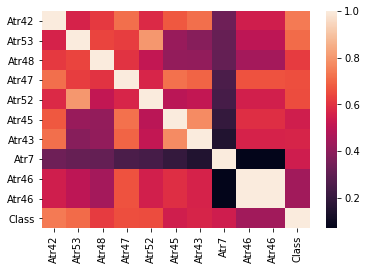

In [9]:
# load the R package ISLR
# load the Auto dataset
auto_df = df
# calculate the correlation matrix
corr = auto_df.corr()
# plot the heatmap
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns)

### Los números más grandes significan más correlación, independientemente del signo.

In [10]:
corr

,Atr42,Atr53,Atr48,Atr47,Atr52,Atr45,Atr43,Atr7,Atr46,Atr46,Class
Atr42,1.000000,0.562994,0.618045,0.717083,0.580543,0.675723,0.719095,0.333211,0.548272,0.548272,0.739629
Atr53,0.562994,1.000000,0.637911,0.623877,0.803221,0.422336,0.387796,0.313725,0.505164,0.505164,0.711176
Atr48,0.618045,0.637911,1.000000,0.602951,0.513645,0.413413,0.409197,0.311110,0.448773,0.448773,0.619830
Atr47,0.717083,0.623877,0.602951,1.000000,0.571223,0.720692,0.695560,0.254225,0.664794,0.664794,0.656409
Atr52,0.580543,0.803221,0.513645,0.571223,1.000000,0.495944,0.513790,0.243104,0.550210,0.550210,0.651478
Atr45,0.675723,0.422336,0.413413,0.720692,0.495944,1.000000,0.775103,0.199548,0.592041,0.592041,0.546450
Atr43,0.719095,0.387796,0.409197,0.695560,0.513790,0.775103,1.000000,0.149930,0.561868,0.561868,0.566242
Atr7,0.333211,0.313725,0.311110,0.254225,0.243104,0.199548,0.149930,1.000000,0.069850,0.069850,0.544835
Atr46,0.548272,0.505164,0.448773,0.664794,0.550210,0.592041,0.561868,0.069850,1.000000,1.000000,0.443465
Atr46,0.548272,0.505164,0.448773,0.664794,0.550210,0.592041,0.561868,0.069850,1.000000,1.000000,0.443465


### Store the predicting class into another variable and drop it from the Table

In [11]:
y= df['Class']
X=df.drop('Class',axis=1)
X.shape

(170, 10)

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=T_SIZE, random_state=77)
y_true = y_test

### Perceptron

In [13]:
from sklearn.datasets import load_digits
from sklearn.linear_model import Perceptron
clf = Perceptron(tol=1e-4, random_state=0)
clf.fit(X_train, y_train)

Perceptron(tol=0.0001)

In [14]:
r_perceptron = clf.score(X_test, y_test)
print(r_perceptron)

0.8235294117647058


### Logistic Regression

In [15]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
#X, y = load_iris(return_X_y=True)
clf = LogisticRegression(random_state=0, solver='lbfgs').fit(X_train, y_train)

In [16]:
r_logisticRegre = clf.score(X_test, y_test)

### Neural Networks

In [17]:
#!pip install tensorflow
import tensorflow.keras
import tensorflow.keras
#from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential,model_from_json
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import RMSprop

In [18]:
model = Sequential()
model.add(Dense(54, activation='sigmoid', input_shape=(10,)))
model.add(Dense(128, activation='sigmoid'))
model.add(Dense(64, activation='sigmoid'))
model.add(Dense(32, activation='sigmoid'))
model.add(Dense(16, activation='sigmoid'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 54)                594       
_________________________________________________________________
dense_1 (Dense)              (None, 128)               7040      
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_3 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_4 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 17        
Total params: 18,515
Trainable params: 18,515
Non-trainable params: 0
____________________________________________________

In [19]:
model.compile(loss='binary_crossentropy',optimizer=RMSprop(),metrics=['accuracy'])
model.fit(X_train,y_train,batch_size=8,epochs=50,verbose=1)

Epoch 1/50
11/11 [==============================] - 0s 2ms/step - loss: 0.7760 - accuracy: 0.4706
Epoch 2/50
11/11 [==============================] - 0s 2ms/step - loss: 0.7151 - accuracy: 0.4706
Epoch 3/50
11/11 [==============================] - 0s 2ms/step - loss: 0.6995 - accuracy: 0.4706
Epoch 4/50
11/11 [==============================] - 0s 2ms/step - loss: 0.6959 - accuracy: 0.4706
Epoch 5/50
11/11 [==============================] - 0s 2ms/step - loss: 0.6937 - accuracy: 0.5294
Epoch 6/50
11/11 [==============================] - 0s 2ms/step - loss: 0.6934 - accuracy: 0.5294
Epoch 7/50
11/11 [==============================] - 0s 2ms/step - loss: 0.6941 - accuracy: 0.5294
Epoch 8/50
11/11 [==============================] - 0s 2ms/step - loss: 0.6935 - accuracy: 0.5294
Epoch 9/50
11/11 [==============================] - 0s 2ms/step - loss: 0.6944 - accuracy: 0.5294
Epoch 10/50
11/11 [==============================] - 0s 2ms/step - loss: 0.6931 - accuracy: 0.5059
Epoch 11/50
11/11 [

In [20]:
test_eval = model.evaluate(X_test, y_test, verbose=1)

print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

r_neural_net = test_eval[1]

3/3 [==============================] - 0s 2ms/step - loss: 0.3502 - accuracy: 0.8353
Test loss: 0.35022521018981934
Test accuracy: 0.8352941274642944


### Random Forest

In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
clf = RandomForestClassifier(n_estimators=100, max_depth=2,random_state=0)
clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=2, random_state=0)

In [22]:
r_random_forest = clf.score(X_test,y_test)
print(r_random_forest)

0.8823529411764706


### Resultados

In [23]:
print('r_perceptron: \t'   , r_perceptron)
print('r_logisticRegre: \t',r_logisticRegre)
print('r_neural_net: \t'   ,r_neural_net)
print('r_random_forest: \t', r_random_forest)

r_perceptron: 	 0.8235294117647058
r_logisticRegre: 	 0.8823529411764706
r_neural_net: 	 0.8352941274642944
r_random_forest: 	 0.8823529411764706


In [24]:
print('r_perceptron:    '   , round(r_perceptron,4))
print('r_logisticRegre: '   , round(r_logisticRegre,4))
print('r_neural_net:    '   , round(r_neural_net,4))
print('r_random_forest: '   , round(r_random_forest,4))

r_perceptron:     0.8235
r_logisticRegre:  0.8824
r_neural_net:     0.8353
r_random_forest:  0.8824
